# Calculate the classical receptive fields based on 500 images and 18 filters

## Get all the images and convert them into gray images

In [170]:
import os
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline



drive_path = '/home/zhixinl/swdb_2017_tools/projects/optimal_context_integration/'
mypath = os.path.join(drive_path,'images/')
image_file_names = [os.path.join(drive_path,'images/',f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
#get list of images
images_list = [np.mean(plt.imread(image_file_name),2) for image_file_name in image_file_names]
images_size = [np.shape(image) for image in images_list]
#get all images into the list which has size 321,481:
long_images=[]
long_images_name = []
for i in range(0,200):
    if images_size[i]==(321,481):
        long_images.append(images_list[i])
        long_images_name.append(image_file_names[i])


#get all the filters from the matlab file:
import scipy.io as spio
#loadmat
filters_mat = spio.loadmat(os.path.join(drive_path,'ephys_data_filts.mat'))
filters = [filters_mat['data_filts'][0][i] for i in range(0,18)]






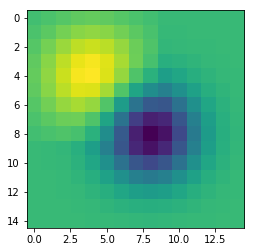

In [158]:
plt.imshow(filters[0]) #filter from 0 to 17

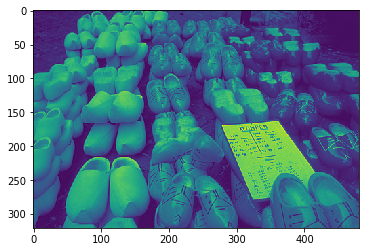

In [159]:
plt.imshow(images_long_list[0])

In [171]:
from scipy import signal
from scipy import misc

conv_long_images = {}#{'filter_index':'images'}
conv_long_images_name = {}#{'filter_index':'images_name'}
for i in range(0,len(filters)):
    temp_imag = []
    temp_name = []
    for j in range(0,len(images_long_list)):
        type(temp_imag)
        temp_imag.append(signal.convolve2d(long_images[j], filters[i], mode='valid'))
        temp_name.append(long_images_name[i])
    conv_long_images[i] = temp_imag
    conv_long_images_name[i] = temp_name
#save the dict
import pickle
conv_result = {'image_names': conv_long_images_name, 'conv_images': conv_long_images }
with open('conv_result.pickle', 'wb') as handle:
    pickle.dump(conv_result, handle)

with open('conv_result.pickle', 'rb') as handle:
    b = pickle.load(handle)

/home/zhixinl/swdb_2017_tools/projects/optimal_context_integration/images/65132.jpg


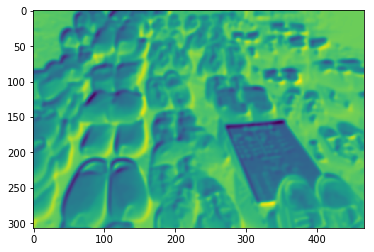

In [179]:
plt.imshow(conv_result['conv_images'][7][0])
print(conv_result['image_names'][7][0])